In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
import matplotlib.ticker as ticker
from mpl_toolkits.mplot3d import axes3d
from prettytable import PrettyTable 

In [2]:
sns.set_style('whitegrid')
%matplotlib inline

# Data Preprocessing

In [3]:
# reading a set of input parameters

params = pd.read_csv('params_example.csv')
data = np.asarray(params)

### Loading models 

In [4]:
# loading models to estimate the number of infected cases

# RQ kernel
gpr_inf_rq = joblib.load('gpr_infected_cases_k2.pkl') 

# RQ+RBF kernel
gpr_inf_add = joblib.load('gpr_infected_cases_k3.pkl') 

In [5]:
# loading models to estimate the day of peak viral activity

# RQ kernel
gpr_peak_rq = joblib.load('gpr_day_k2.pkl')

# RQ+RBF kernel
gpr_peak_add = joblib.load('gpr_day_k3.pkl')

In [6]:
# loading models to estimate the dynamics of COVID-19

# RQ kernel
gpr_dyn_rq = joblib.load('gpr_dyn_k2.pkl')

# RQ+RBF kernel
gpr_dyn_add = joblib.load('gpr_dyn_k3.pkl')

# The estimation of infected cases


In [7]:
pred_inf_rq = gpr_inf_rq.predict(data, return_std=False)
pred_inf_add = gpr_inf_add.predict(data, return_std=False)

In [8]:
x3 = params['delta']
y3 = params['r0']
z3 = np.zeros(len(params['delta']))

dx = [0.03] * len(params['delta'])
dy = [0.03] * len(params['r0'])
dz_rq = pred_inf_rq
dz_add = pred_inf_add

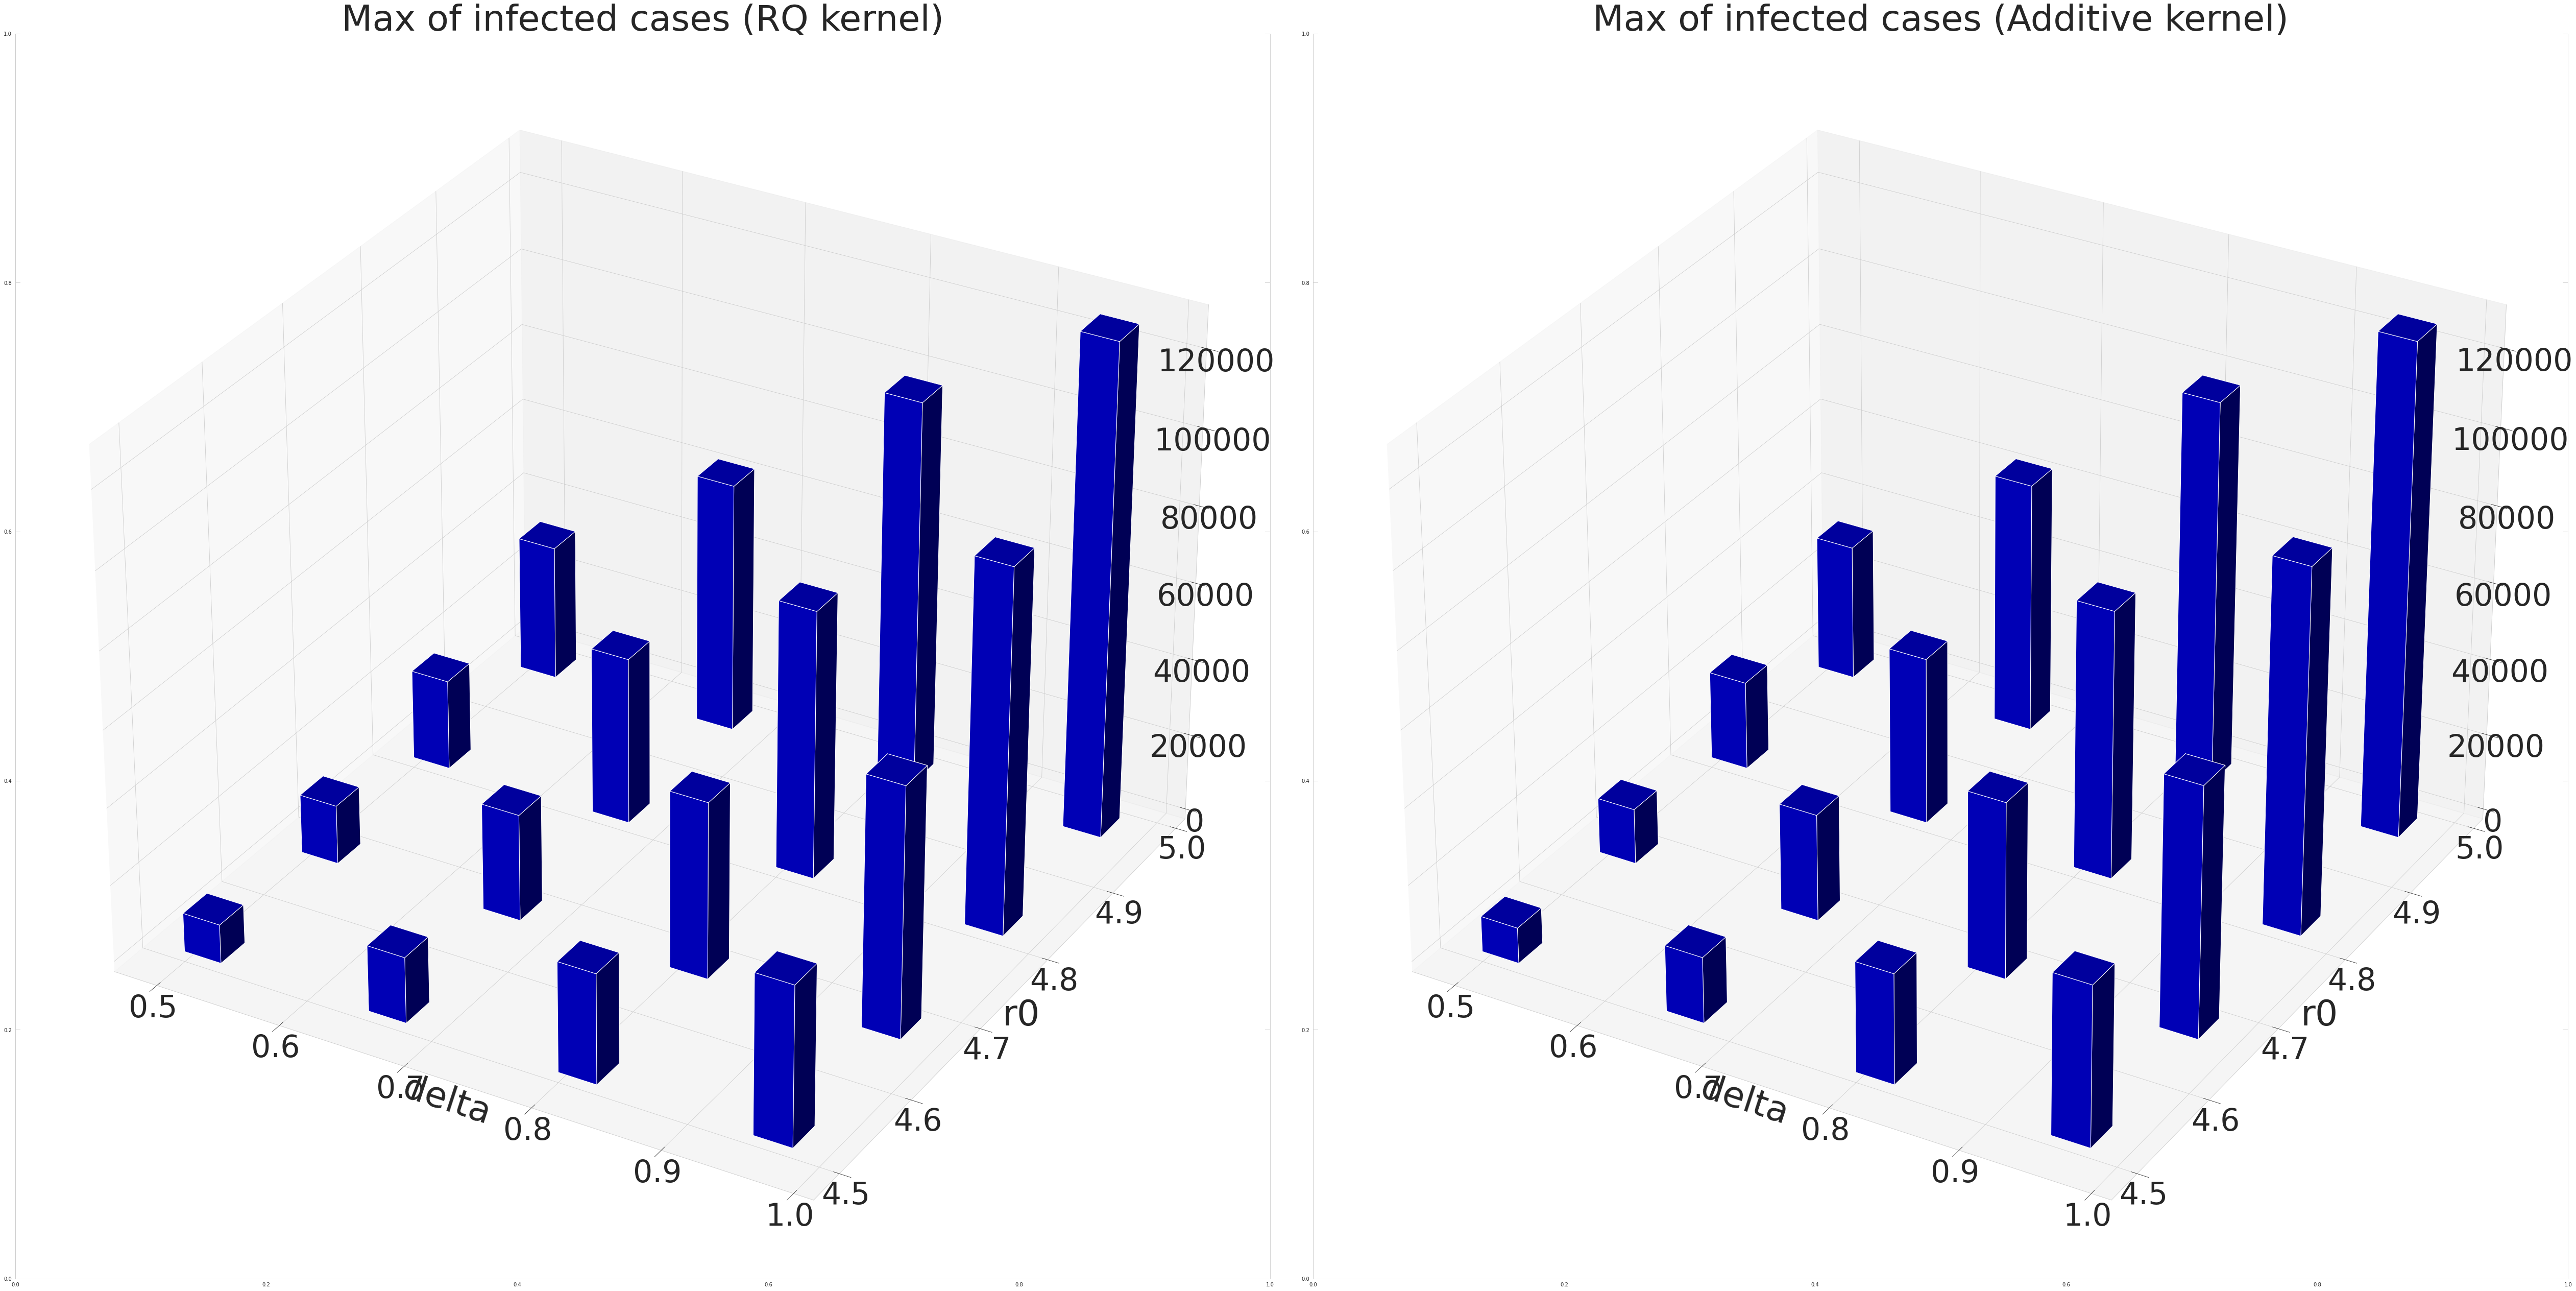

In [9]:
fig1, axs1 = plt.subplots(1, 2, figsize=(70, 35), layout='constrained')

axs1[0] = fig1.add_subplot(121, projection='3d')
axs1[0].bar3d(x3, y3, z3, dx, dy, dz_rq, color='mediumblue')
axs1[0].set_xlabel('delta', fontsize=70)
axs1[0].set_ylabel('r0', fontsize=70)
axs1[0].set_title('Max of infected cases (RQ kernel)', fontsize = 70)

axs1[1] = fig1.add_subplot(122, projection='3d')
axs1[1].bar3d(x3, y3, z3, dx, dy, dz_add, color='mediumblue')
axs1[1].set_xlabel('delta', fontsize=70)
axs1[1].set_ylabel('r0', fontsize=70)
axs1[1].set_title('Max of infected cases (Additive kernel)', fontsize = 70)

axs1[0].grid(True)
axs1[1].grid(True)

axs1[0].tick_params(axis='both', which='major', labelsize=60)
axs1[1].tick_params(axis='both', which='major', labelsize=60)

fig1.savefig('infected_cases.png')

# The estimation of the day of peak viral activity

In [10]:
pred_peak_rq = gpr_peak_rq.predict(data, return_std=False)
pred_peak_add = gpr_peak_add.predict(data, return_std=False)

In [11]:
pred_peak_rq = [round(day) for day in pred_peak_rq]
pred_peak_add = [round(day) for day in pred_peak_add]

In [12]:
# writing results to .csv

peak_res_rq = pd.DataFrame(pred_peak_rq)
peak_res_add = pd.DataFrame(pred_peak_rq)

peak_res_rq = pd.concat([params, peak_res_rq], axis=1, ignore_index=True)
peak_res_add = pd.concat([params, peak_res_add], axis=1, ignore_index=True)

peak_res_rq.to_csv('peak_res_rq.csv', index=False)
peak_res_add.to_csv('peak_res_add.csv', index=False)

In [13]:
pred_peak_rq

[93, 93, 93, 93, 93, 93, 93, 93, 92, 92, 92, 91, 92, 91, 91, 89]

In [14]:
pred_peak_add

[93, 93, 94, 93, 93, 93, 93, 93, 92, 92, 92, 91, 92, 91, 91, 89]

In [15]:
# plotting the results

x3 = params['delta']
y3 = params['r0']
z3 = np.zeros(len(params['delta']))

dx = [0.03] * len(params['delta'])
dy = [0.03] * len(params['r0'])
dz_rq = pred_peak_rq
dz_add = pred_peak_add

In [16]:
langs = [[param[0], param[1]] for param in data]

In [17]:
pred_peak_rq

[93, 93, 93, 93, 93, 93, 93, 93, 92, 92, 92, 91, 92, 91, 91, 89]

In [18]:
pred_peak_rq

[93, 93, 93, 93, 93, 93, 93, 93, 92, 92, 92, 91, 92, 91, 91, 89]

In [19]:
param_str = [f'[{round(param[0], 2)}; {round(param[1], 2)}]' for param in data]

In [20]:
def add_value_labels(ax, spacing=5):

    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = spacing
        va = 'bottom'

        if y_value < 0:
            space *= -1
            va = 'top'

        label = "{:.1f}".format(y_value)

        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va,
            size=45,
            rotation=45)                

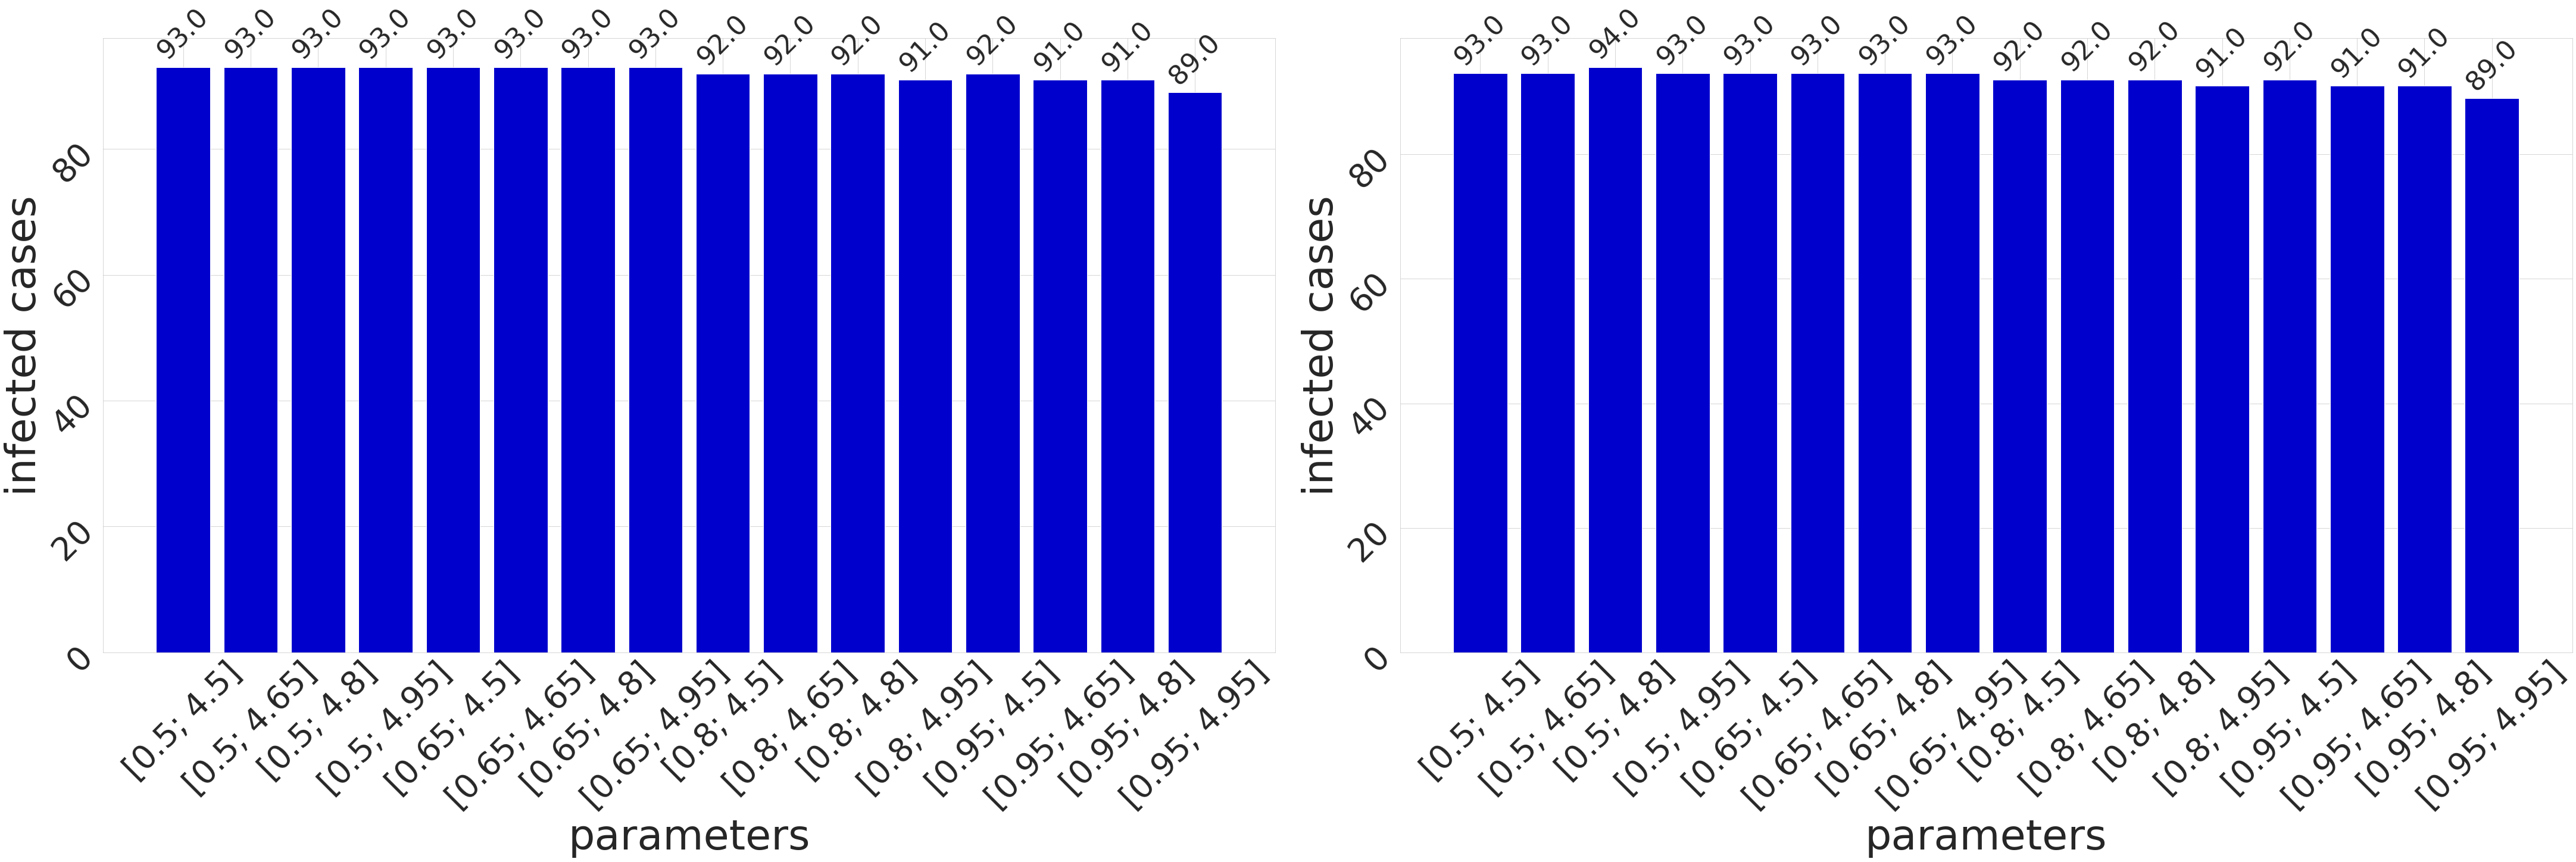

In [21]:
fig2, axs2 = plt.subplots(1, 2, figsize=(60, 20), layout='constrained')

axs2[0].bar(param_str, pred_peak_rq, color='mediumblue')
axs2[0].set_xlabel('parameters', fontsize=70)
axs2[0].set_ylabel('infected cases', fontsize=70)

axs2[1].bar(param_str, pred_peak_add, color='mediumblue')
axs2[1].set_xlabel('parameters', fontsize=70)
axs2[1].set_ylabel('infected cases', fontsize=70)

axs2[0].grid(True)
axs2[1].grid(True)

axs2[0].tick_params(axis='both', which='major', labelsize=55, labelrotation=45)
axs2[1].tick_params(axis='both', which='major', labelsize=55, labelrotation=45)

add_value_labels(axs2[0])
add_value_labels(axs2[1])

# The estimation of the dynamics of COVID-19

In [22]:
pred_dyn_rq = gpr_dyn_rq.predict(data, return_std=False)
pred_dyn_add = gpr_dyn_add.predict(data, return_std=False)

In [23]:
# writing results to .csv

dyn_res_rq = pd.DataFrame(pred_peak_rq)
dyn_res_add = pd.DataFrame(pred_peak_rq)

dyn_res_rq.to_csv('dyn_res_rq.csv', index=False)
dyn_res_add.to_csv('dyn_res_add.csv', index=False)

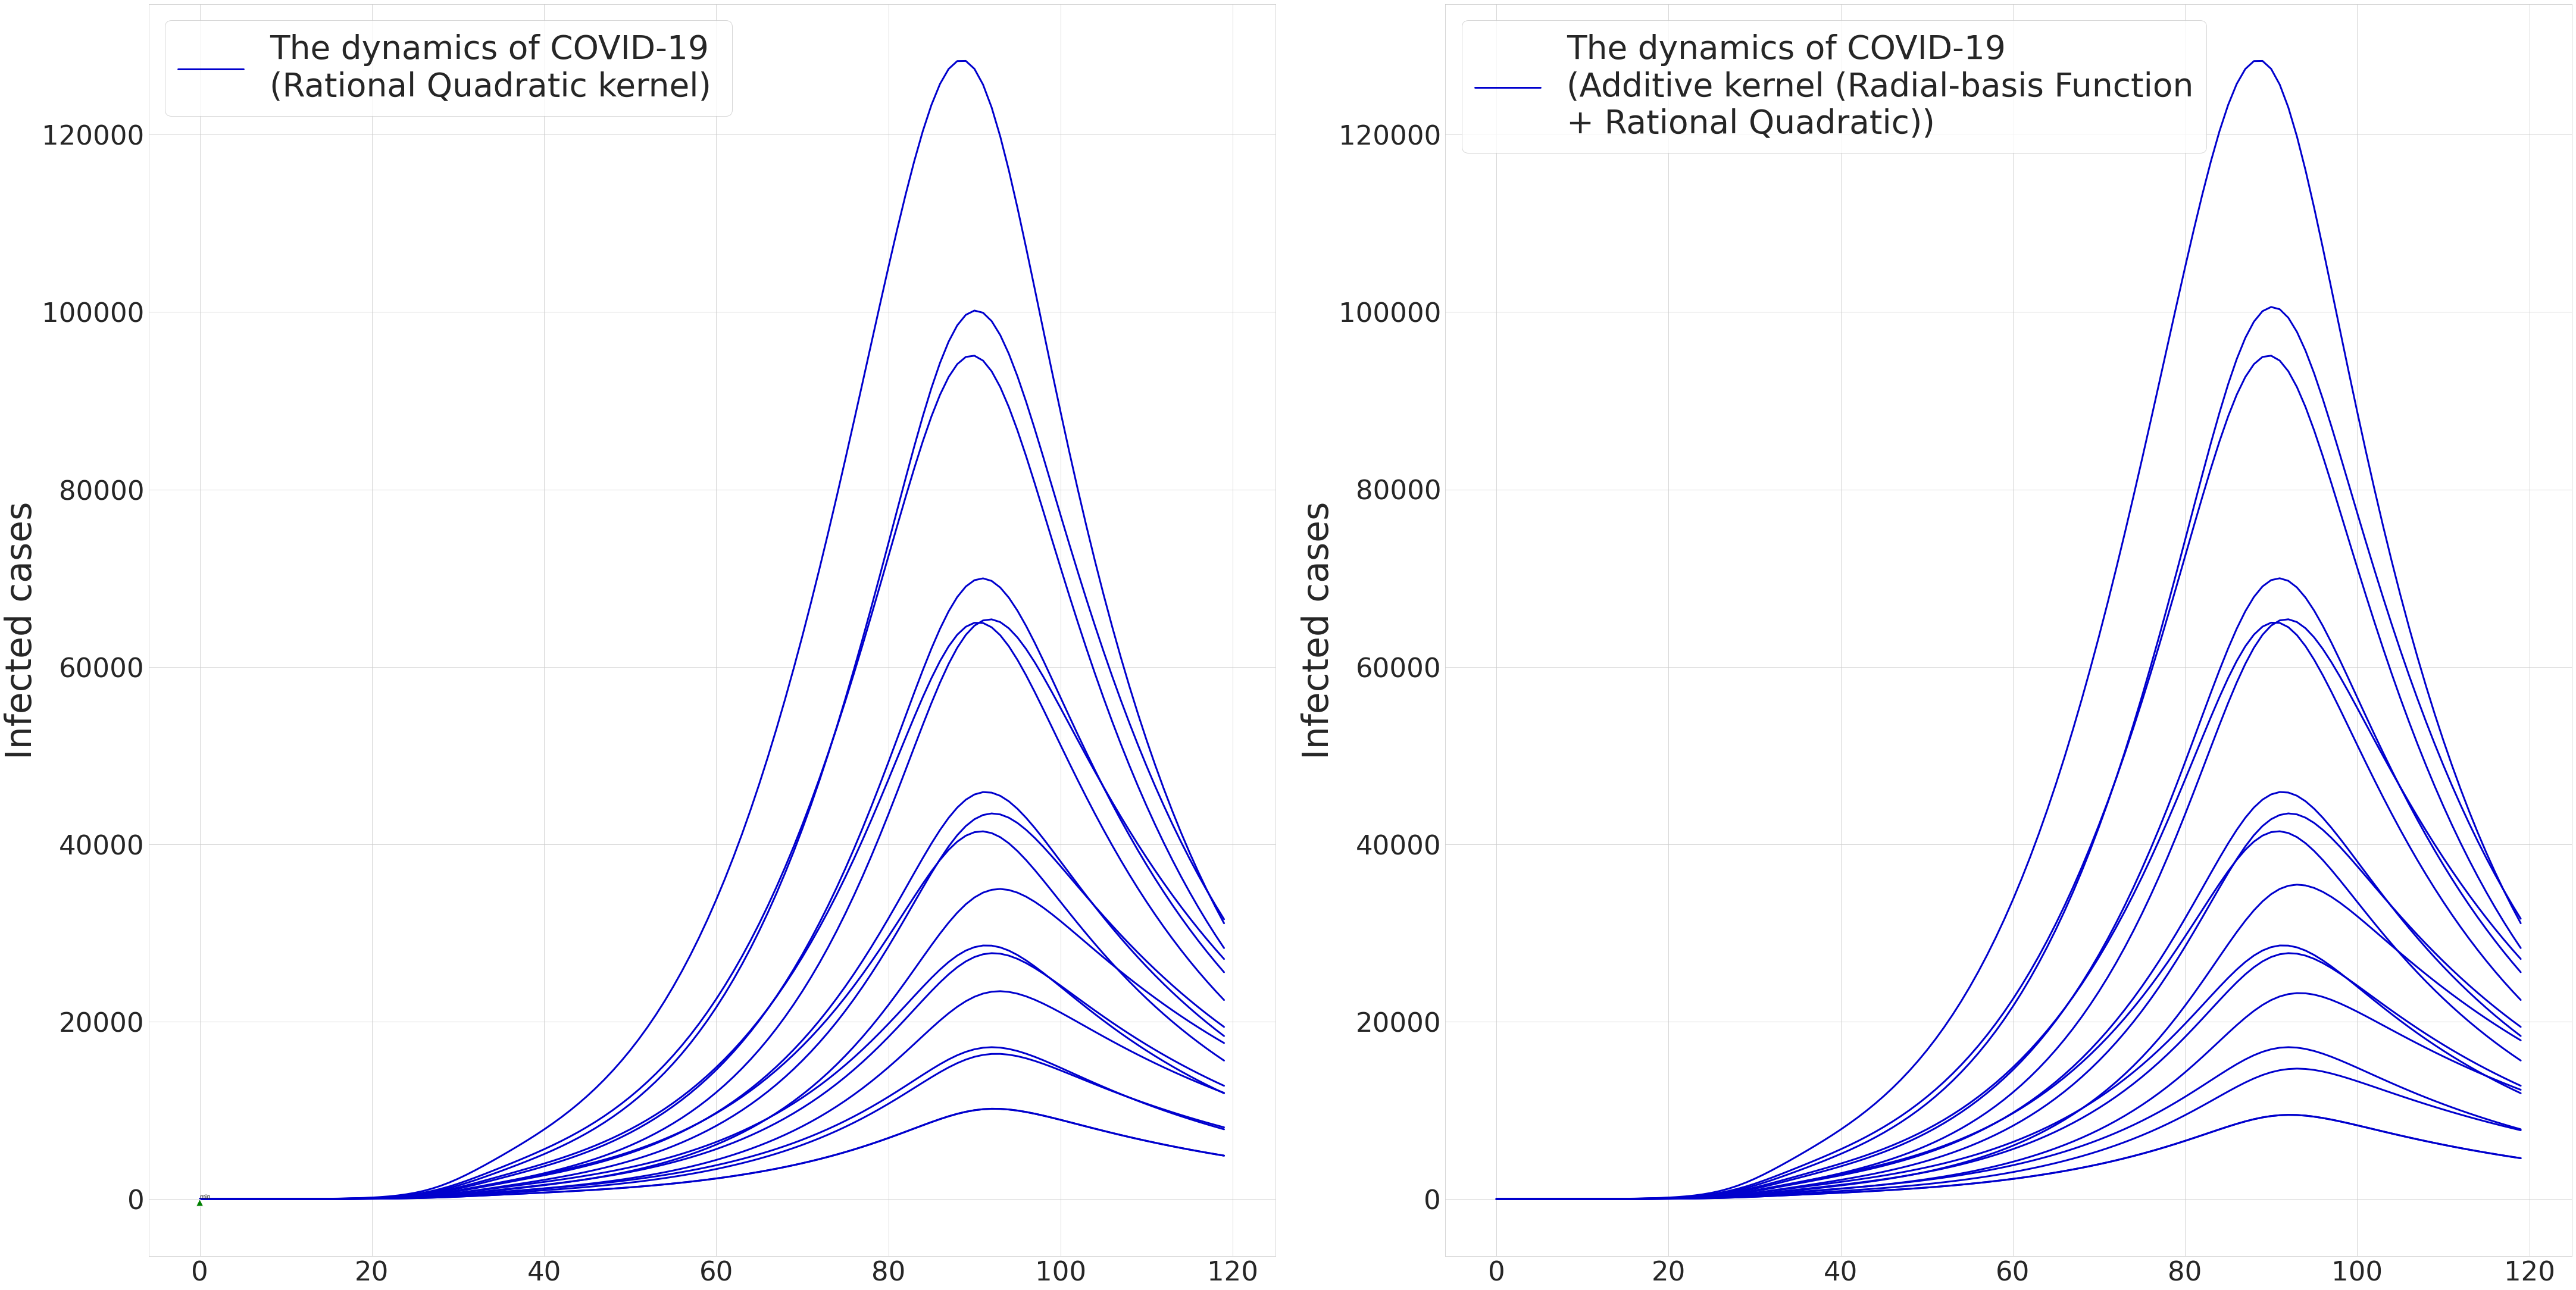

In [24]:
# plotting the results

fig3, axs3 = plt.subplots(1, 2, figsize=(60, 30), layout='constrained')

axs3[0].plot(pred_dyn_rq[0], linewidth = 3, color='mediumblue', 
            label='The dynamics of COVID-19 \n'+
            '(Rational Quadratic kernel)')

for i in range(len(pred_dyn_rq)):
    axs3[0].plot(pred_dyn_rq[i], linewidth = 3, color='mediumblue')

axs3[0].set_ylabel('Infected cases', fontsize=60)
axs3[0].legend(prop={'size': 55})

axs3[0].annotate('min', xy=(0, 0),  xycoords='data',
            xytext=(0, 10), textcoords='data',
            arrowprops=dict(facecolor='g'))

axs3[1].plot(pred_dyn_add[0], linewidth = 3, color='mediumblue', 
            label='The dynamics of COVID-19 \n'+
            '(Additive kernel (Radial-basis Function\n'+
            '+ Rational Quadratic))')

for i in range(len(pred_dyn_add)):
    axs3[1].plot(pred_dyn_add[i], linewidth = 3, color='mediumblue')

axs3[1].set_ylabel('Infected cases', fontsize=60)
axs3[1].legend(prop={'size': 55})

axs3[0].grid(True)
axs3[1].grid(True)

axs3[0].tick_params(axis='both', which='major', labelsize=45)
axs3[1].tick_params(axis='both', which='major', labelsize=45)

In [25]:
# real dynamics

data_ = pd.read_csv('spb.combined.daily.txt', '\t', index_col=['TIME'], 
                   parse_dates=['TIME'], encoding='cp1251')
data_.drop(['Yandex.ACTIVITY.points', 'v1.CS', 'v2.CS', 'CONFIRMED.spb', 
            'PCR.tested'], axis =1 , inplace = True)
data_.fillna(0, inplace = True)
data_ = data_[data_.index <= '2020-06-30']

y_true = data_.ACTIVE
y_true = y_true.to_numpy()
y_true = y_true[:len(y_true)-1]

/home/alexandra/Jupyter/Jupyter/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3340: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [26]:
# find optimal input parameters

def metrics_best(y_pred):
    metrics_df = pd.DataFrame(columns=['MSE', 'R-squared'])
    
    for i in range(len(y_pred)):
        mse = metrics.mean_squared_error(y_true, y_pred[i], squared=True)   
        r_squared = metrics.r2_score(y_true, y_pred[i])
                
        tmp_df = pd.DataFrame(columns=['MSE', 'R-squared'])
        tmp_df.loc[len(tmp_df.index)] = [round(mse, 5), round(r_squared, 5)]
        
        metrics_df = pd.concat([metrics_df, tmp_df], ignore_index=True, axis=0)
    
    return metrics_df

In [27]:
# find best parameters (MSE)

def params_best(metrics_df, y_pred, params):
    # mse
    metrics_df['MSE'] = pd.to_numeric(metrics_df['MSE'])
    mse_min = metrics_df['MSE'].idxmin()
    best_curve1 = y_pred[mse_min]
    best_params1 = params[mse_min]
    mse_metric = metrics_df['MSE'][mse_min]
    
    return best_curve1, best_params1, mse_metric

In [28]:
# formation of parameter sets

delta = np.arange(0.5, 1, 0.02)
r0 = np.arange(4.3, 5, 0.02)

params_df = pd.DataFrame(columns=['delta', 'r0'])

for d in delta:
    for r in r0:
        tmp_df = pd.DataFrame({'delta': [d],
                               'r0': [r]
                              })
        
        params_df = pd.concat([params_df, tmp_df], ignore_index=True, axis=0)

params = np.asarray(params_df)

In [29]:
pred_dyn_rq_ = gpr_dyn_rq.predict(params, return_std=False)
pred_dyn_add_ = gpr_dyn_add.predict(params, return_std=False)

In [30]:
best_metrics_rq_ = metrics_best(pred_dyn_rq_)
best_metrics_add_ = metrics_best(pred_dyn_add_)

In [31]:
params_best_rq_ = params_best(best_metrics_rq_, pred_dyn_rq_, params)
params_best_add_ = params_best(best_metrics_add_, pred_dyn_add_, params)

In [32]:
best_curve_rq_ = params_best_rq_[0]
best_curve_add_ = params_best_add_[0]

best_params_rq_ = params_best_rq_[1]
best_params_add_ = params_best_add_[1]

metric_best_rq_ = params_best_rq_[2]
metric_best_add_ = params_best_add_[2]

In [33]:
print('Rational Quadratic kernel:')
x = PrettyTable()

x.field_names = ["Metric", "Params"]
x.add_row([f"MSE ({metric_best_rq_})", best_params_rq_])

print(x)

print('Additive kernel:')
x = PrettyTable()

x.field_names = ["Metric", "Params"]
x.add_row([f"MSE ({metric_best_add_})", best_params_add_])

print(x)

Rational Quadratic kernel:
+--------------------+----------------------------------------+
|       Metric       |                 Params                 |
+--------------------+----------------------------------------+
| MSE (636863.87785) | [0.7000000000000002 4.339999999999999] |
+--------------------+----------------------------------------+
Additive kernel:
+--------------------+--------------------------+
|       Metric       |          Params          |
+--------------------+--------------------------+
| MSE (636578.54574) | [0.7200000000000002 4.3] |
+--------------------+--------------------------+


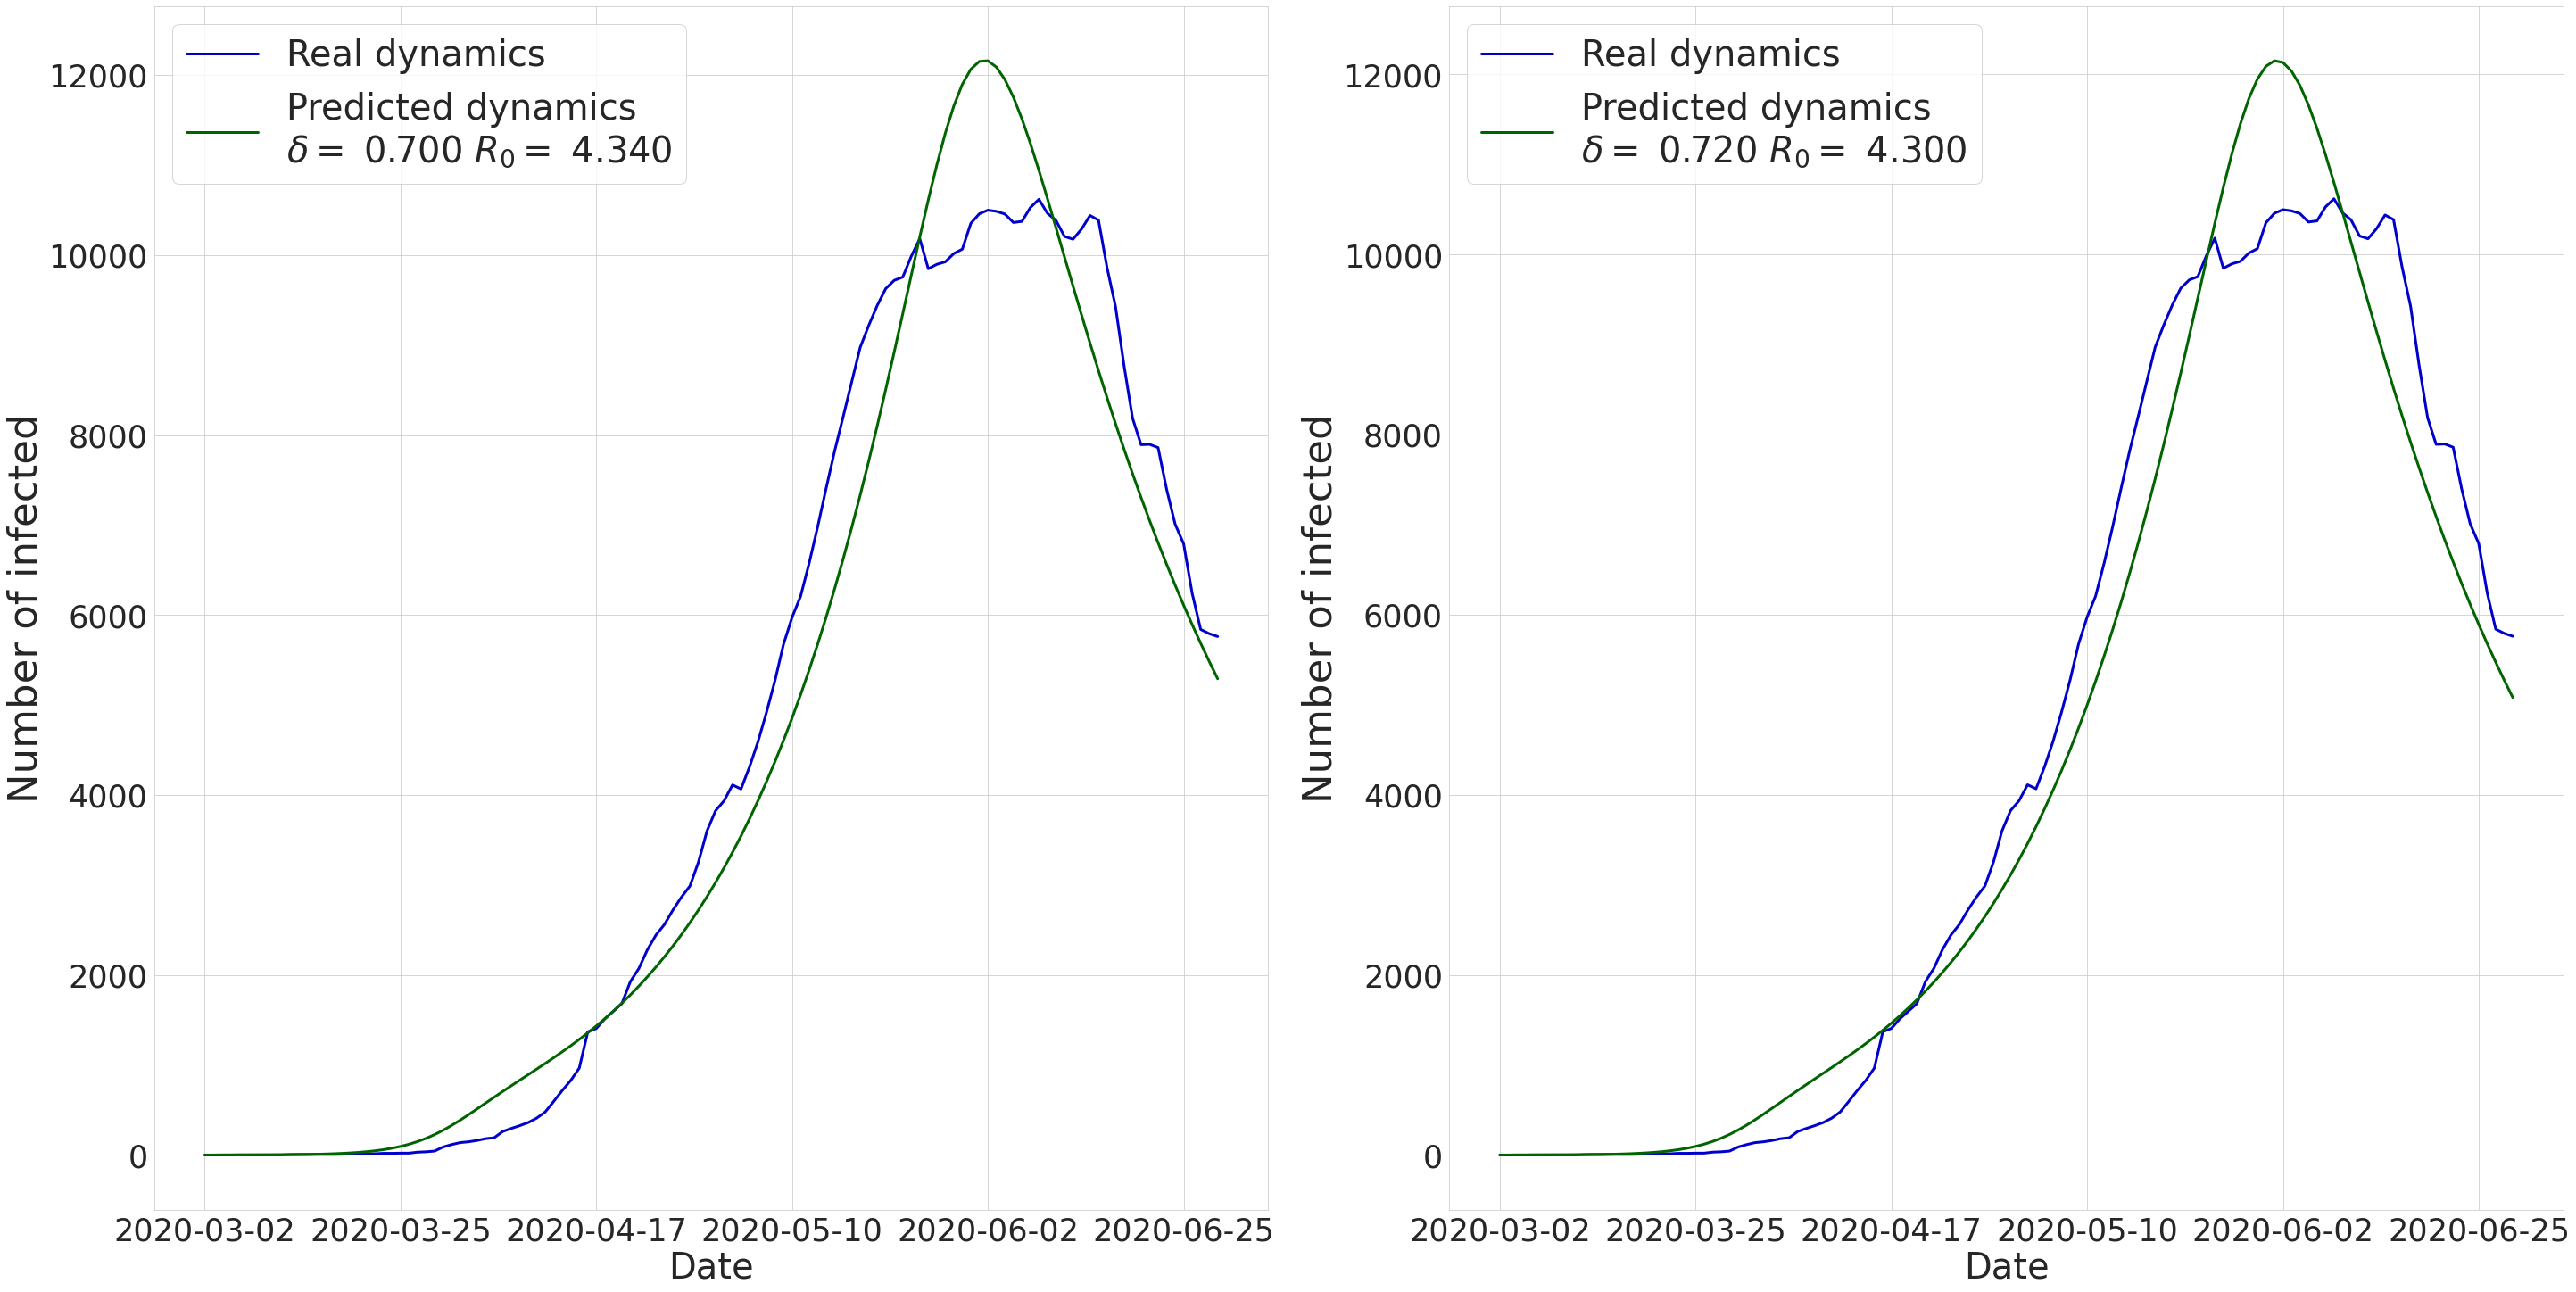

In [34]:
params_rq = r'$\delta=$' + f'{best_params_rq_[0]: 0.3f} ' + r'$R_{0}=$' + f'{best_params_rq_[1]: 0.3f}'
params_add = r'$\delta=$' + f'{best_params_add_[0]: 0.3f} ' + r'$R_{0}=$' + f'{best_params_add_[1]: 0.3f}'

x_axis = data_.index[:len(data_.index)-1]
x_axis_lst = []

for date in x_axis:
    x_axis_lst.append(date.strftime("%Y-%m-%d"))

fig, axs = plt.subplots(1, 2, figsize=(40, 20), layout='constrained')

axs[0].plot(x_axis_lst, y_true, linewidth = 3, color='mediumblue', label='Real dynamics')
axs[0].plot(x_axis_lst, best_curve_rq_, linewidth = 3, color='darkgreen', label=f'Predicted dynamics\n{params_rq}')    
axs[0].set_xlabel('Date', fontsize=40)
axs[0].set_ylabel('Number of infected', fontsize=45)
axs[0].legend(prop={'size': 40})
axs[0].xaxis.set_major_locator(ticker.MultipleLocator(23))

axs[1].plot(x_axis_lst, y_true, linewidth = 3, color='mediumblue', label='Real dynamics')
axs[1].plot(x_axis_lst, best_curve_add_, linewidth = 3, color='darkgreen', label=f'Predicted dynamics\n{params_add}')    
axs[1].set_xlabel('Date', fontsize=40)
axs[1].set_ylabel('Number of infected', fontsize=45)
axs[1].legend(prop={'size': 40})
axs[1].xaxis.set_major_locator(ticker.MultipleLocator(23))

axs[0].grid(True)
axs[1].grid(True)

axs[0].tick_params(axis='both', which='major', labelsize=35)
axs[1].tick_params(axis='both', which='major', labelsize=35)